In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 49.5MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_main = pd.read_csv('/content/Jamboree_Admission.csv')

In [ ]:
df_main.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df_main.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df_main.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
def analyze_statistics(df):
    for column in df.select_dtypes(include=['float64', 'int64']):
        stats = df[column].describe()
        print(f"\nStatistical Analysis for {column}:")
        print(f"Skewness: {df[column].skew():.2f}")
        print(f"Kurtosis: {df[column].kurtosis():.2f}")
        print(f"Range: {stats['max'] - stats['min']:.2f}")

analyze_statistics(df_main)


Statistical Analysis for Serial No.:
Skewness: 0.00
Kurtosis: -1.20
Range: 499.00

Statistical Analysis for GRE Score:
Skewness: -0.04
Kurtosis: -0.71
Range: 50.00

Statistical Analysis for TOEFL Score:
Skewness: 0.10
Kurtosis: -0.65
Range: 28.00

Statistical Analysis for University Rating:
Skewness: 0.09
Kurtosis: -0.81
Range: 4.00

Statistical Analysis for SOP:
Skewness: -0.23
Kurtosis: -0.71
Range: 4.00

Statistical Analysis for LOR :
Skewness: -0.15
Kurtosis: -0.75
Range: 4.00

Statistical Analysis for CGPA:
Skewness: -0.03
Kurtosis: -0.56
Range: 3.12

Statistical Analysis for Research:
Skewness: -0.24
Kurtosis: -1.95
Range: 1.00

Statistical Analysis for Chance of Admit :
Skewness: -0.29
Kurtosis: -0.45
Range: 0.63


In [ ]:
# Checking for duplicate values
duplicates = df_main.duplicated().sum()
duplicates

0

In [ ]:
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

detect_outliers(df_main, df_main.select_dtypes(include=['float64', 'int64']).columns)

{'Serial No.': 0,
 'GRE Score': 0,
 'TOEFL Score': 0,
 'University Rating': 0,
 'SOP': 0,
 'LOR ': 1,
 'CGPA': 0,
 'Research': 0,
 'Chance of Admit ': 2}

In [ ]:
df_main.drop(columns=['Serial No.'],axis=1, inplace=True)

In [ ]:
df_main.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


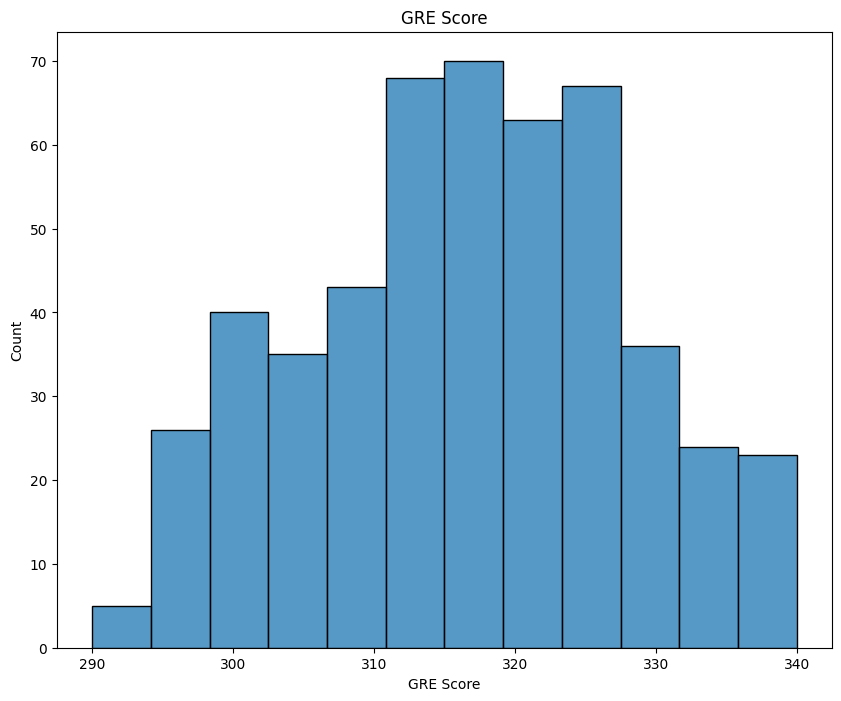

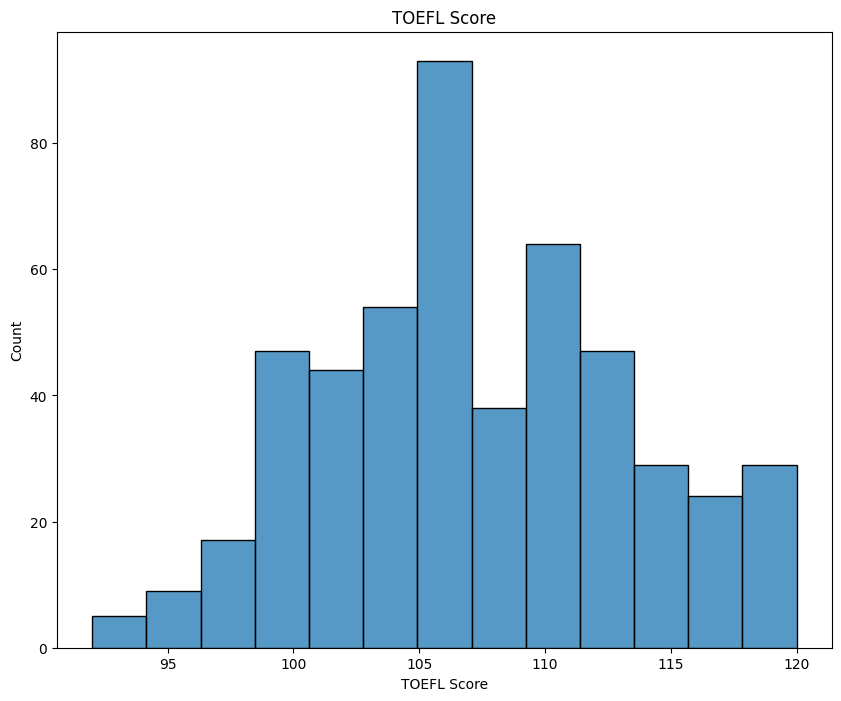

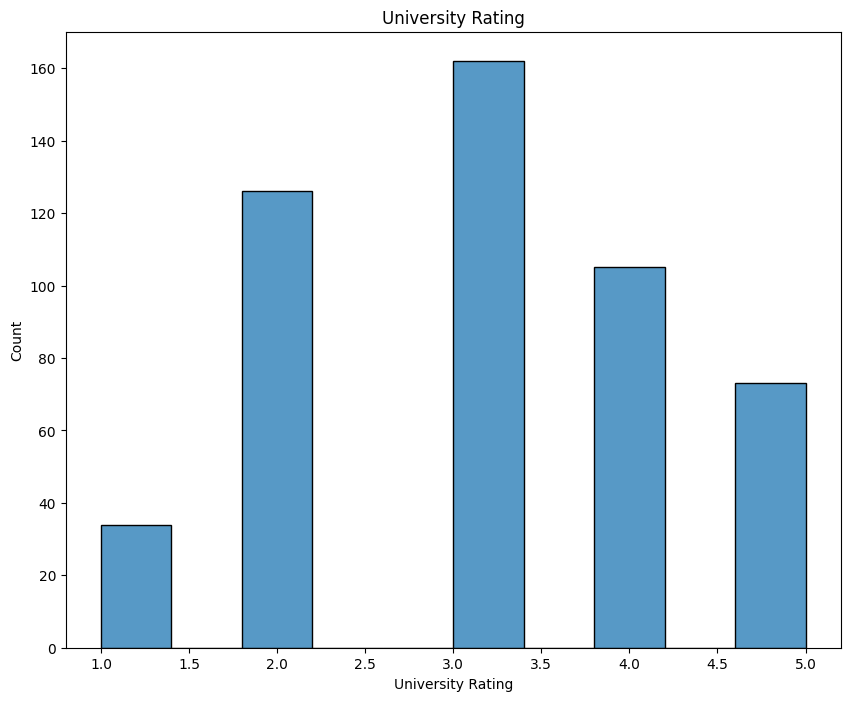

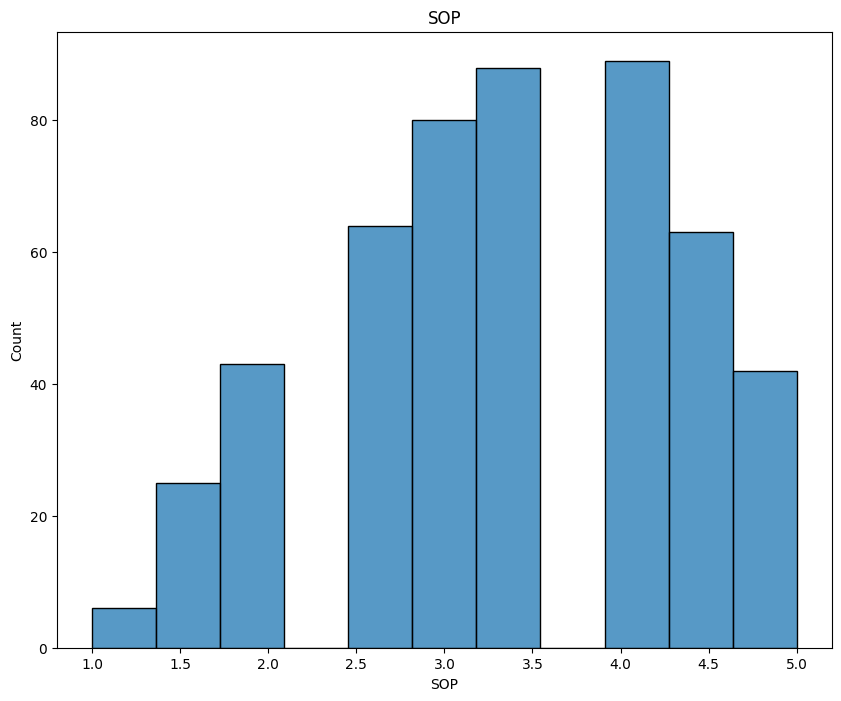

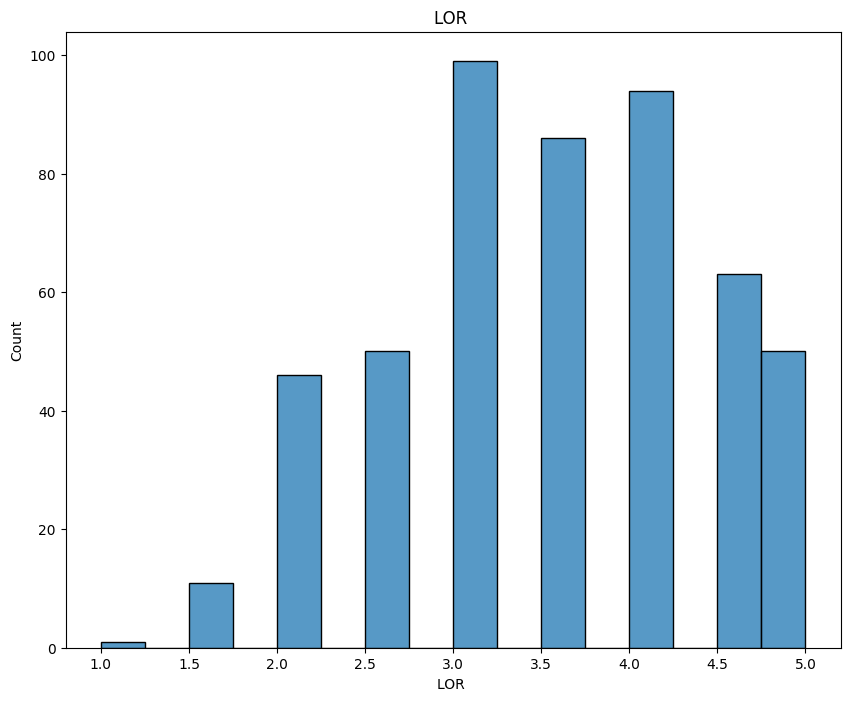

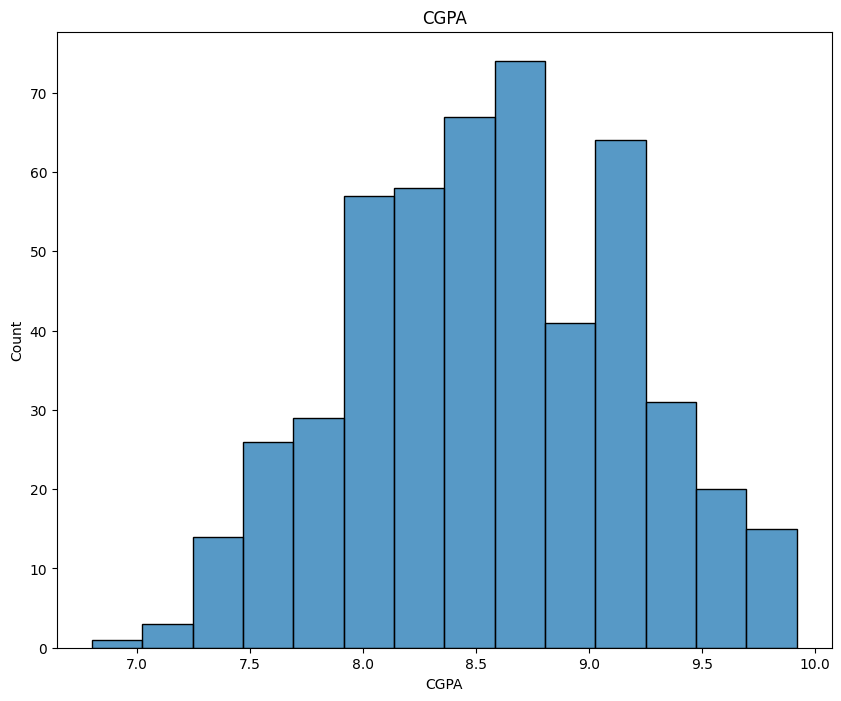

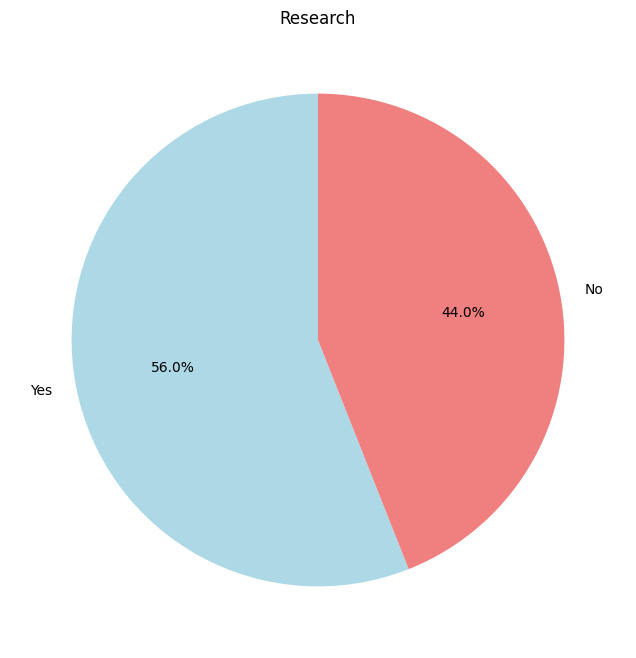

In [ ]:
import seaborn as sns
def check_distribution(col):
  plt.figure(figsize=(10,8))
  plt.title(col)
  if col == 'Research':
      data = df_main[col].value_counts()
      labels = data.index.map({1: "Yes", 0: "No"})
      plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
  else:
    sns.histplot(data = df_main, x=col)


for col in df_main.iloc[:,:-1].columns:
  check_distribution(col)

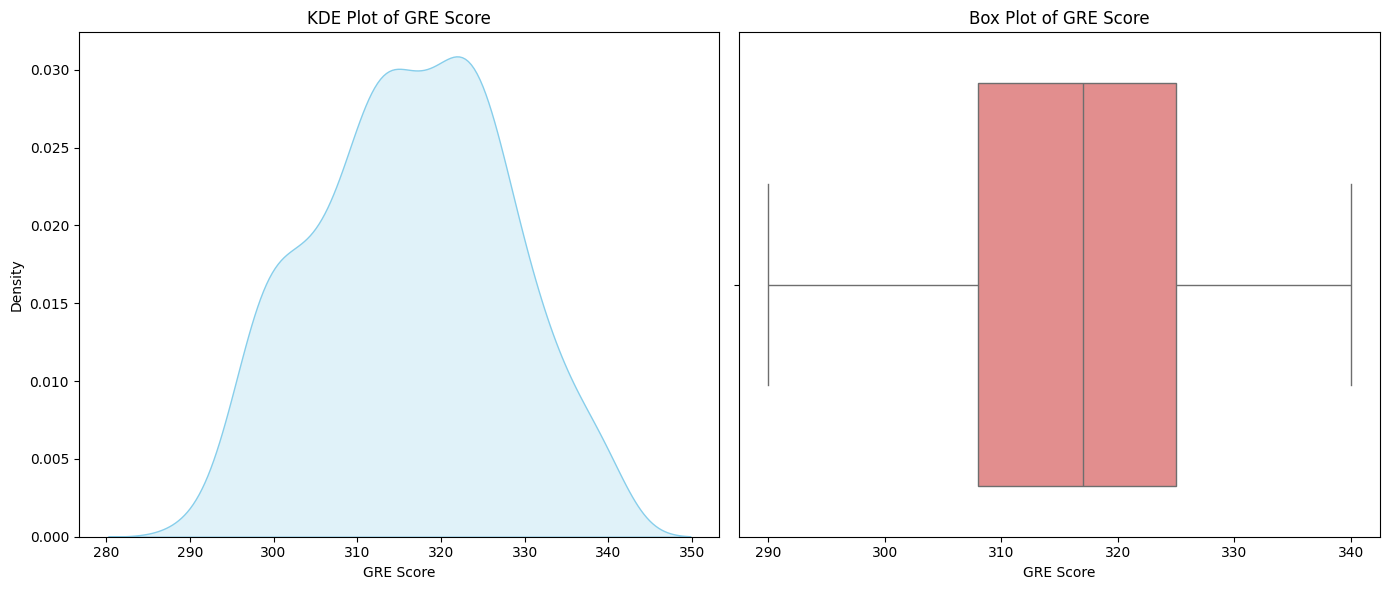

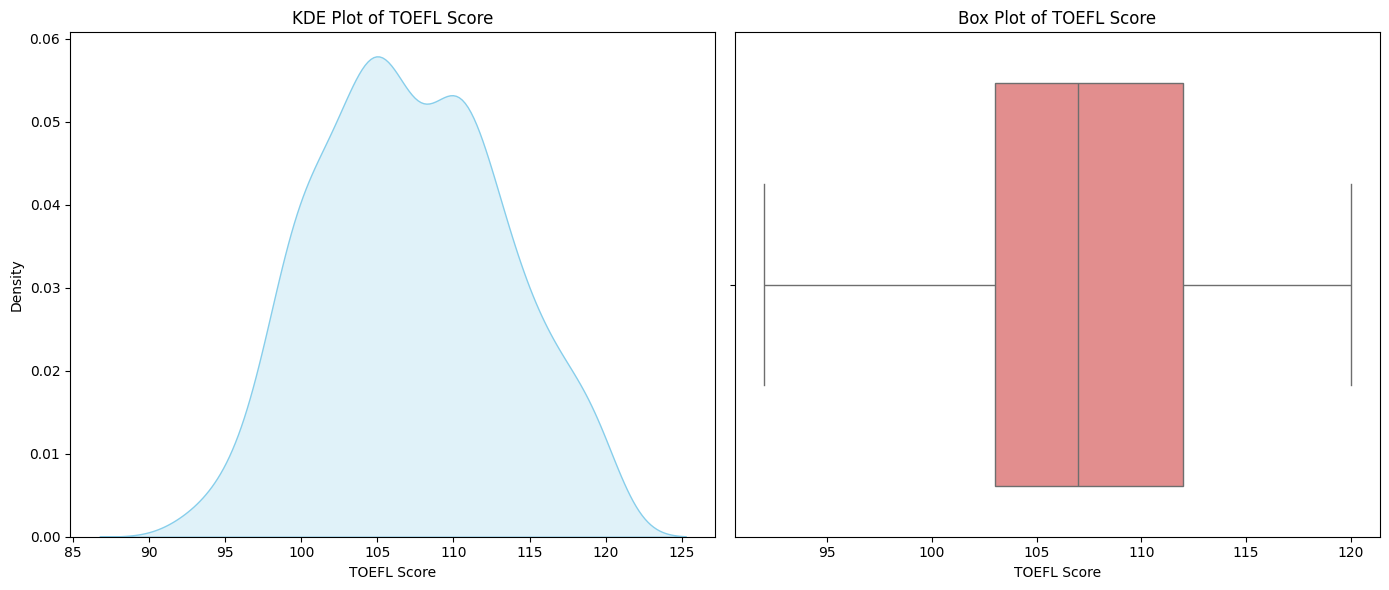

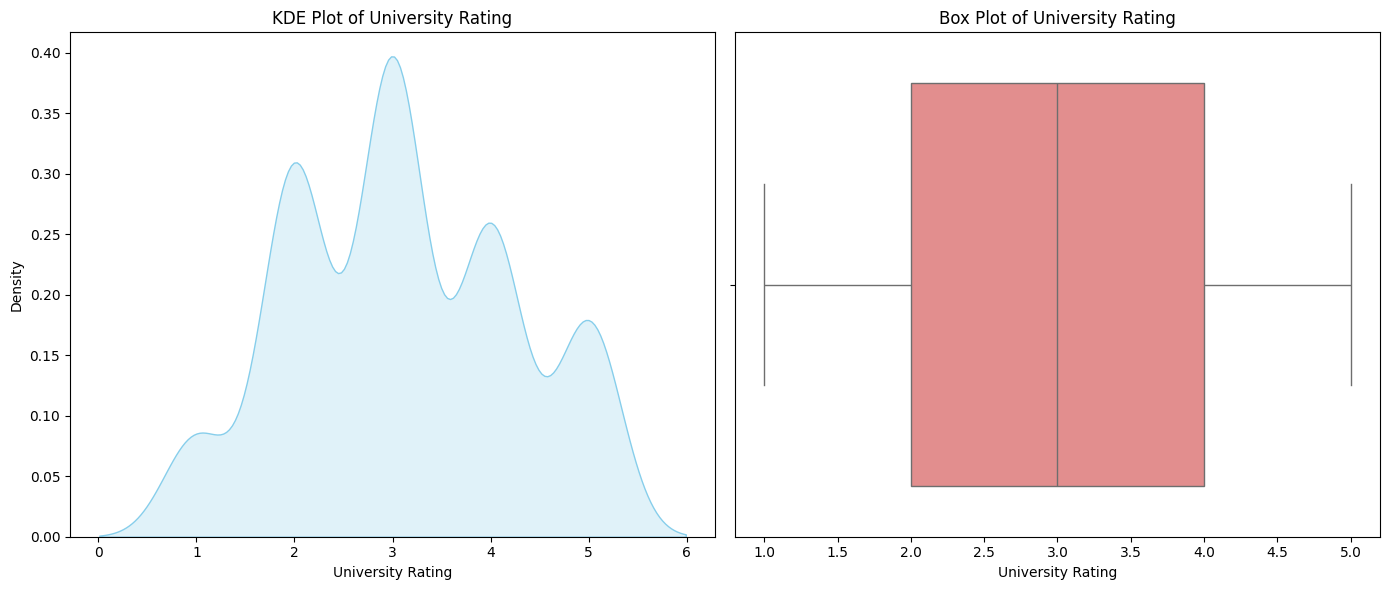

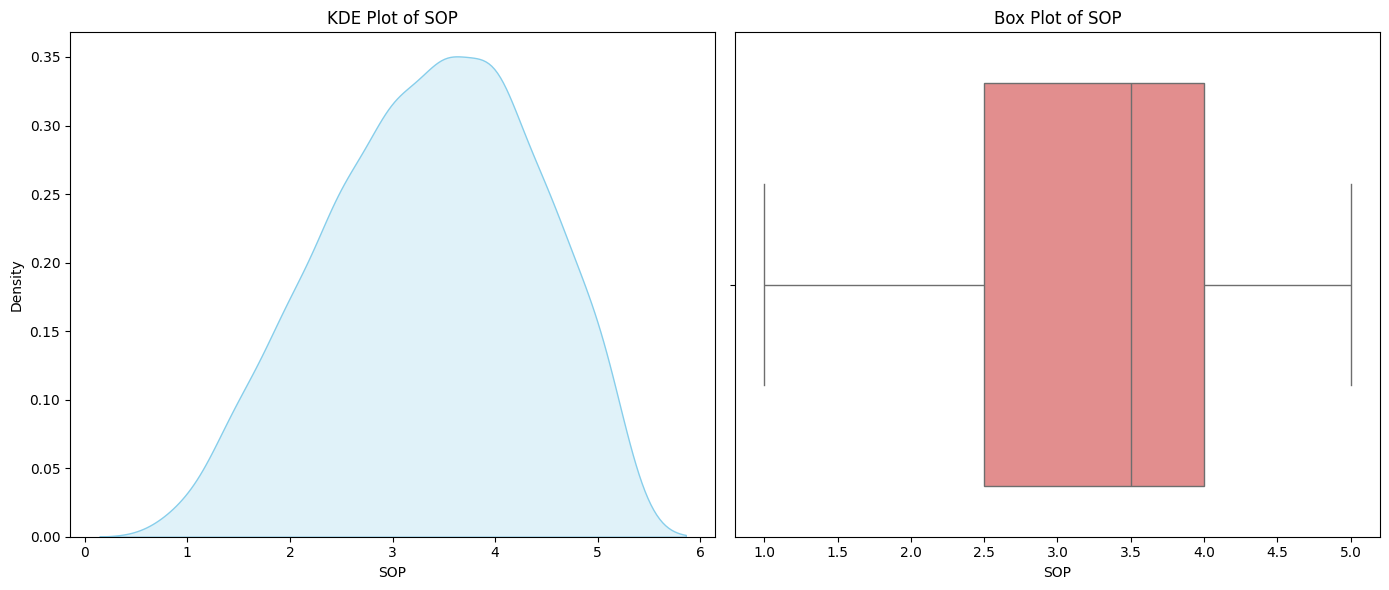

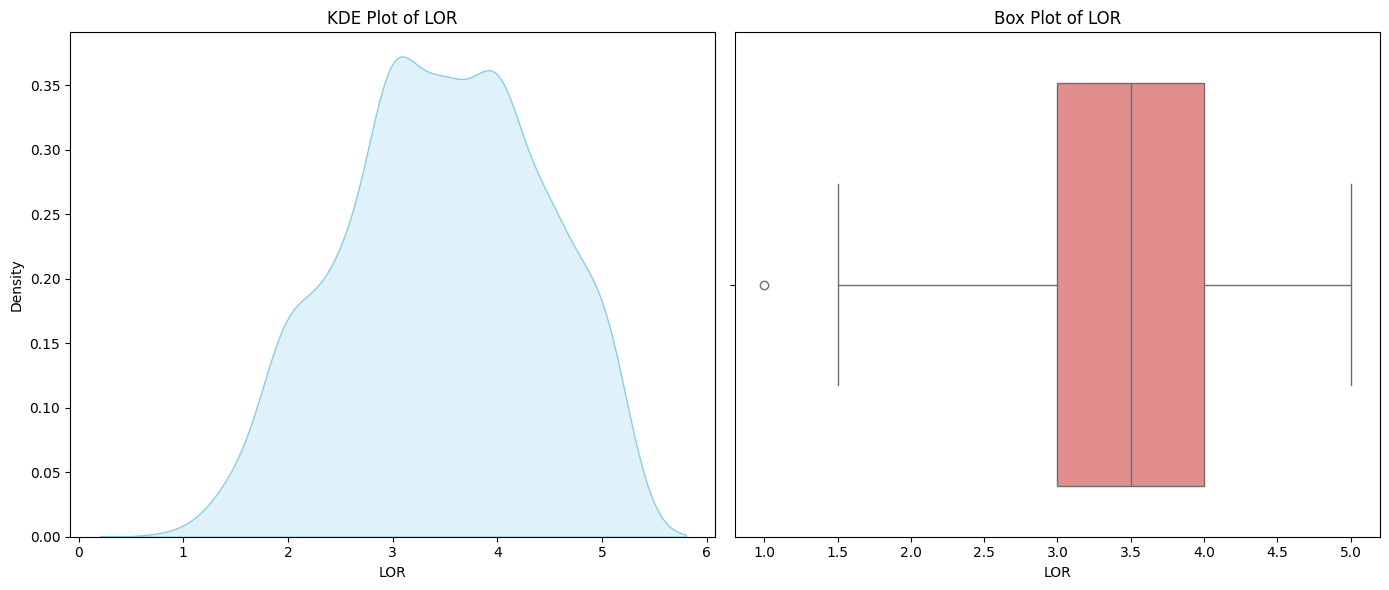

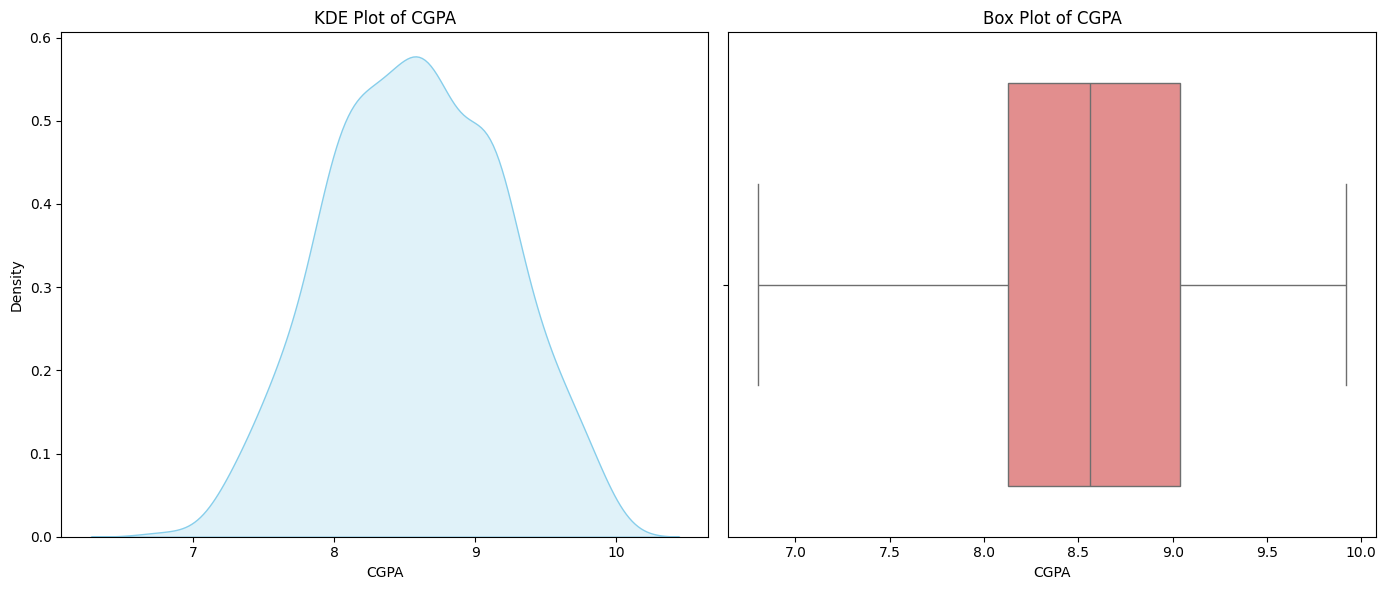

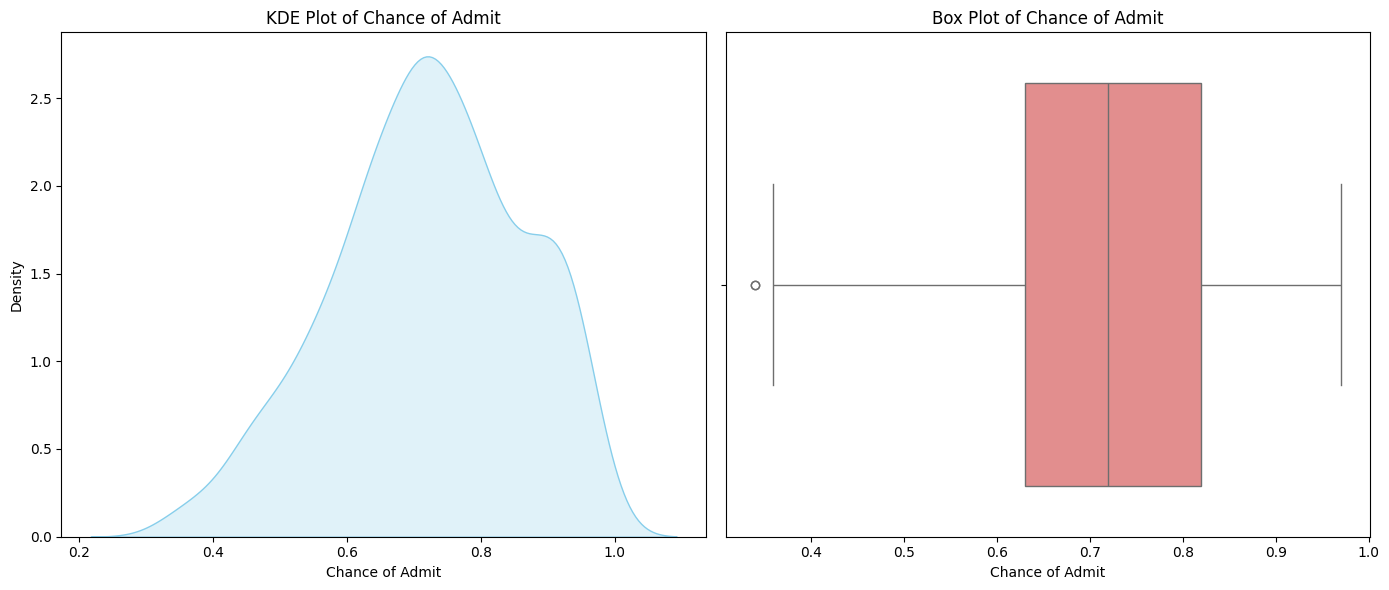

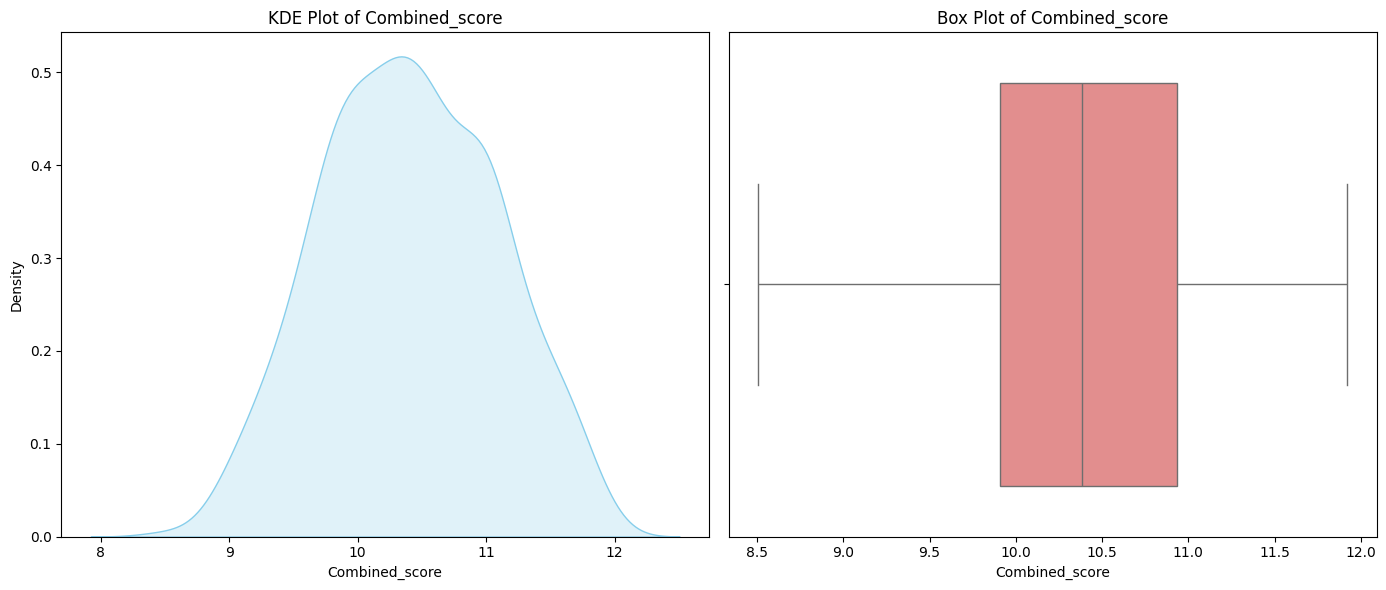

In [ ]:

def check_distribution_kde_boxplot(col):
    if col != 'Research':
      fig, axes = plt.subplots(1, 2, figsize=(14, 6))


      sns.kdeplot(data=df_main, x=col, ax=axes[0], fill=True, color="skyblue")
      axes[0].set_title(f"KDE Plot of {col}")


      sns.boxplot(data=df_main, x=col, ax=axes[1], color="lightcoral")
      axes[1].set_title(f"Box Plot of {col}")

      plt.tight_layout()
      plt.show()

for col in df_main.iloc[:,:].columns:
  check_distribution_kde_boxplot(col)

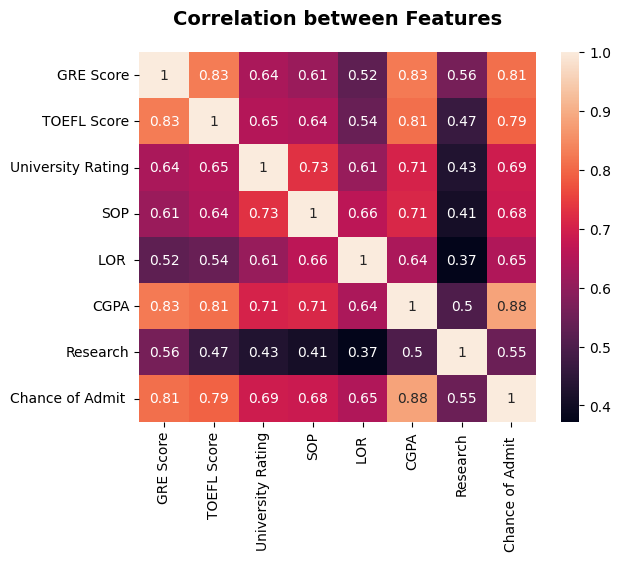

In [ ]:
sns.heatmap(df_main.corr(), annot=True)
plt.title('Correlation between Features', fontsize=14, fontweight='bold', pad=20)
plt.show()

In [ ]:
df_main.columns = df_main.columns = df_main.columns.str.strip()

In [ ]:
X, y = df_main.drop('Chance of Admit', axis=1), df_main['Chance of Admit']

In [ ]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(400, 100, 400, 100)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
scaled_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.325906,1.931245,0.757101,1.610495,1.078640,1.064380,0.872992
1,1.238676,0.785834,1.615006,0.621703,1.613945,1.969858,0.872992
2,1.849290,1.767615,0.757101,-0.367089,1.078640,1.323088,0.872992
3,0.366369,-0.850468,-0.100804,0.127307,0.543335,0.692488,0.872992
4,-1.639937,-1.177728,-0.100804,-0.861485,0.543335,-1.021451,0.872992


In [ ]:
# Linear Regression using sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([0.01611005, 0.01789014, 0.00406069, 0.00404683, 0.01622322,
       0.07657168, 0.01364507])

In [ ]:
lr.intercept_

0.7234500000000001

In [ ]:
def plot_predictions(model, X_test, y_test):
  y_hat = model.predict(X_test)
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_hat, color='blue', alpha=0.6, label="Predicted Values")
  plt.scatter(y_test, y_test, color='red', alpha=0.6, label="Actual Values")

  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.legend()
  plt.title("Actual vs Predicted Values")
  plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def adjusted_r2(r2, sample_size, size):
    numerator = (1-r2)*(sample_size-1)
    denominator = sample_size - size - 1
    score = 1 - (numerator/denominator)
    return score



def evaluate_model(model, X_test, y_test,X_train, y_train):
  y_pred = model.predict(X_train)
  mse = mean_squared_error(y_train, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_train, y_pred)
  adj_r2 = adjusted_r2(r2, len(y_train), X_train.shape[1])
  print(f'''
  Training data statistics
    Mean squared error = {mse}
    Root mean squared error = {rmse}
    R2 Score = {r2}
    Adjusted R2 Score = {adj_r2}
  ''')
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  adj_r2 = adjusted_r2(r2, len(y_test), X_test.shape[1])
  print(f'''
  Testing data statistics
    Mean squared error = {mse}
    Root mean squared error = {rmse}
    R2 Score = {r2}
    Adjusted R2 Score = {adj_r2}
  ''')

In [ ]:
evaluate_model(lr, X_test_scaled, y_test,X_train_scaled, y_train)


  Training data statistics
    Mean squared error = 0.0036436238661064603
    Root mean squared error = 0.06036243754278368
    R2 Score = 0.8245271132220857
    Adjusted R2 Score = 0.8213936688153373
  

  Testing data statistics
    Mean squared error = 0.0031881806465515637
    Root mean squared error = 0.056463976538599935
    R2 Score = 0.8042498554642961
    Adjusted R2 Score = 0.7893558227278838
  


In [ ]:
# Model does not perform well because of the very high correlation between
# CGPA GRE TOEFL

# Combine them into one feature
# Based on what transformations i applied to gre and toefl i got different results
# checking online and trying myself i found this to be the best
df_main['Combined_score'] = (df_main['GRE Score'] / 340 + df_main['TOEFL Score'] / 120) + df_main['CGPA']
# df_main['Combined_score'] = (df_main['GRE Score'] *10 / 340 + df_main['TOEFL Score']*10 / 120) + df_main['CGPA']

In [ ]:
df_main.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Combined_score
0,337,118,4,4.5,4.5,9.65,1,0.92,11.624510
1,324,107,4,4.0,4.5,8.87,1,0.76,10.714608
2,316,104,3,3.0,3.5,8.00,1,0.72,9.796078
3,322,110,3,3.5,2.5,8.67,1,0.80,10.533725
4,314,103,2,2.0,3.0,8.21,0,0.65,9.991863


In [ ]:
new_scaler = StandardScaler()
X_new = df_main.drop(columns=['Chance of Admit', 'GRE Score', 'TOEFL Score', 'CGPA'])
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
new_scaler.fit(X_train)
X_train_scaled = new_scaler.transform(X_train)
X_test_scaled = new_scaler.transform(X_test)


In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_new.columns)
X_train_scaled_df.head()

,University Rating,SOP,LOR,Research,Combined_score
0,-0.098298,0.126796,0.564984,0.895434,0.437067
1,0.775459,0.633979,1.651491,-1.116777,-0.018460
2,-0.098298,0.126796,-0.521524,-1.116777,-0.247543
3,-0.972054,-0.887570,0.564984,-1.116777,-0.480729
4,-0.098298,0.126796,-1.064777,0.895434,-0.609268


In [ ]:
lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
lr2.coef_

array([0.00582502, 0.00260901, 0.01373883, 0.01695661, 0.10142165])

In [ ]:
lr2.intercept_

0.7241749999999999

In [ ]:
evaluate_model(lr2, X_test_scaled, y_test,X_train_scaled, y_train)


  Training data statistics
    Mean squared error = 0.003759836606544623
    Root mean squared error = 0.06131750652582526
    R2 Score = 0.8092307542625382
    Adjusted R2 Score = 0.8068098247481034
  

  Testing data statistics
    Mean squared error = 0.0034223806865523038
    Root mean squared error = 0.05850111696841612
    R2 Score = 0.8326464211954864
    Adjusted R2 Score = 0.8237446350888633
  


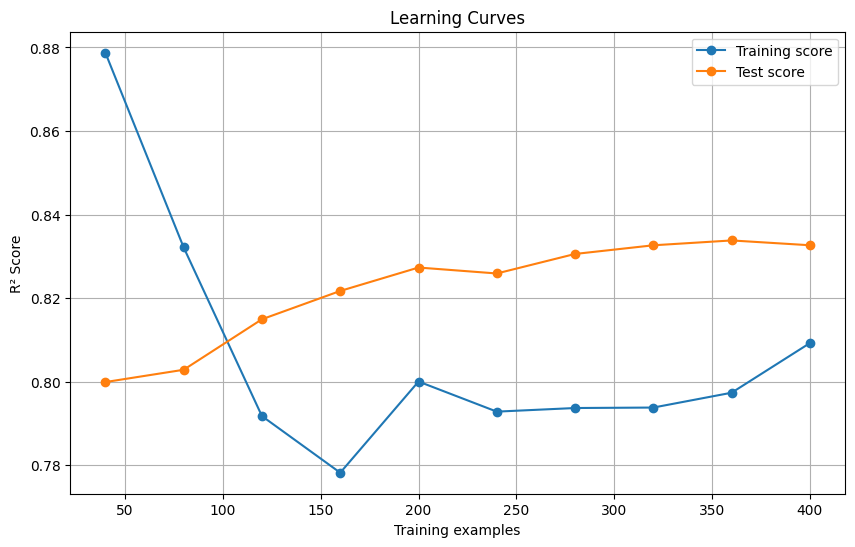

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curves(model, X_train, X_test, y_train, y_test):
    # Create arrays for different training set sizes
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores = []
    test_scores = []

    for size in train_sizes:
        n_samples = int(len(X_train) * size)
        model.fit(X_train[:n_samples], y_train[:n_samples])
        train_score = model.score(X_train[:n_samples], y_train[:n_samples])
        test_score = model.score(X_test, y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes * len(X_train), train_scores, 'o-', label='Training score')
    plt.plot(train_sizes * len(X_train), test_scores, 'o-', label='Test score')
    plt.xlabel('Training examples')
    plt.ylabel('R² Score')
    plt.title('Learning Curves')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curves(lr2, X_train_scaled, X_test_scaled, y_train, y_test)

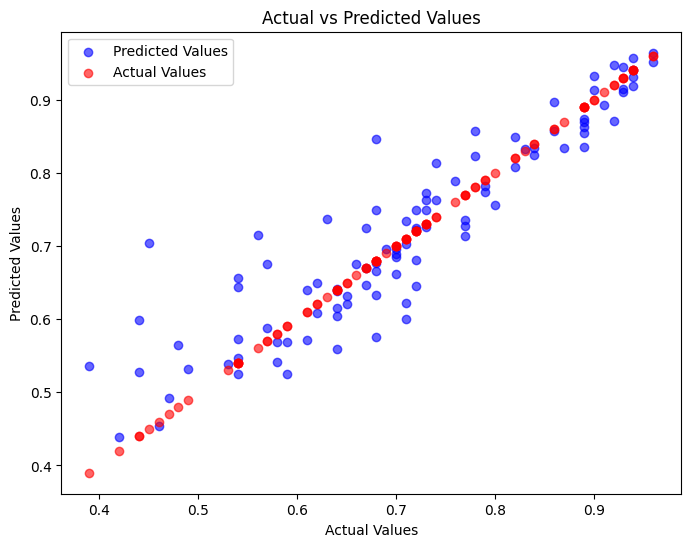

In [ ]:
plot_predictions(lr2, X_test_scaled, y_test)

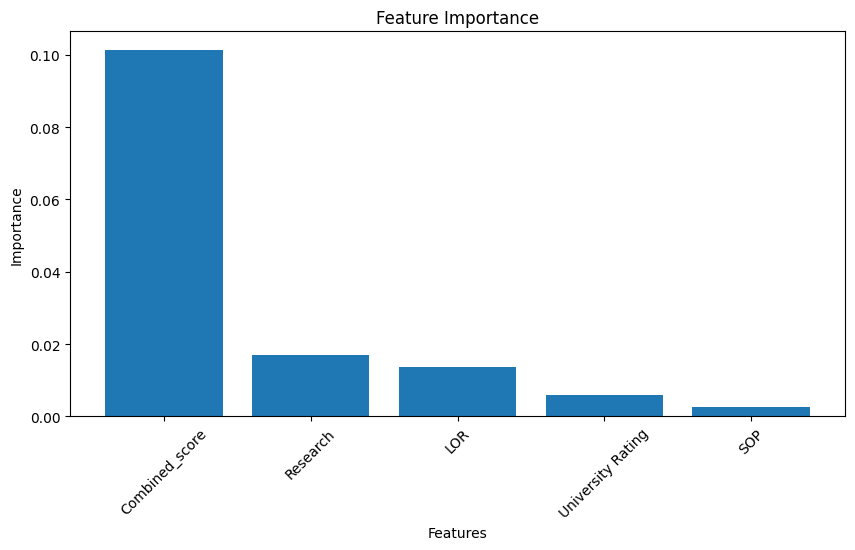

In [ ]:
coefficients = lr2.coef_
features = X_train_scaled_df.columns
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = np.array(features)[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

plt.figure(figsize=(10, 5))
plt.bar(x=sorted_features, height=sorted_coefficients)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Using OLS Model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
X_test_sm = sm.add_constant(X_test_scaled)
evaluate_model(model, X_test_sm, y_test, X_train_sm, y_train)


  Training data statistics
    Mean squared error = 0.003759836606544624
    Root mean squared error = 0.061317506525825266
    R2 Score = 0.8092307542625382
    Adjusted R2 Score = 0.8063182466940273
  

  Testing data statistics
    Mean squared error = 0.0034223806865523116
    Root mean squared error = 0.05850111696841618
    R2 Score = 0.832646421195486
    Adjusted R2 Score = 0.8218494161113239
  


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     334.3
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          2.79e-139
Time:                        01:10:13   Log-Likelihood:                 549.10
No. Observations:                 400   AIC:                            -1086.
Df Residuals:                     394   BIC:                            -1062.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    234.427      0.0

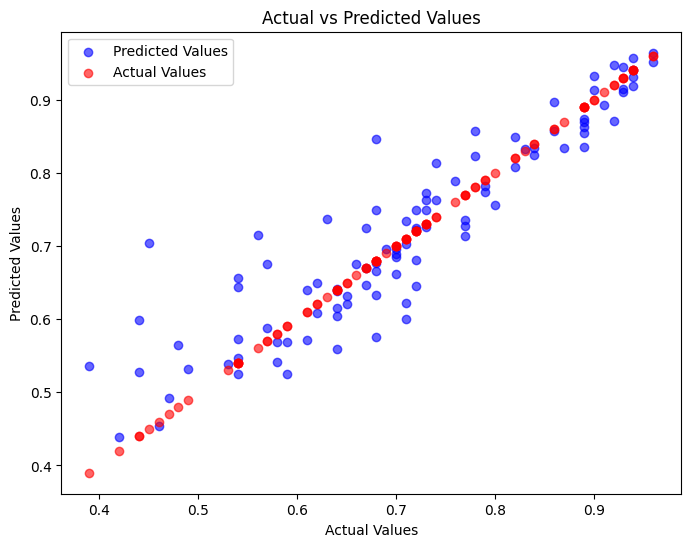

In [ ]:
plot_predictions(model, X_test_sm, y_test)

In [ ]:
# Before combining features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_df, i) for i in range(scaled_df.shape[1])]
sorted_vif = vif_data.sort_values(by='VIF', ascending=False)
sorted_vif

,feature,VIF
5,CGPA,4.951766
0,GRE Score,4.647707
1,TOEFL Score,3.961174
3,SOP,2.863042
2,University Rating,2.719241
4,LOR,2.071110
6,Research,1.512649


<Axes: title={'center': 'VIF Scores'}, xlabel='feature', ylabel='VIF'>

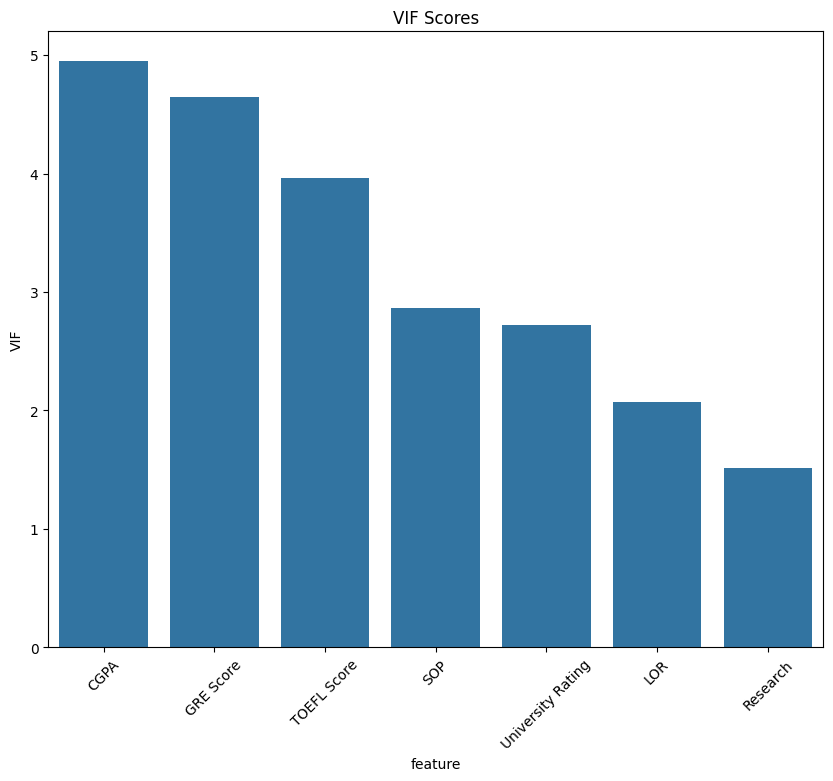

In [ ]:
plt.figure(figsize=(10,8))
plt.title("VIF Scores")
plt.xticks(rotation=45)
sns.barplot(data=sorted_vif,x='feature', y='VIF' )

In [ ]:
# Mean of residuals
print("Mean of residuals",np.mean(model.resid))

Mean of residuals -4.6074255521944e-16


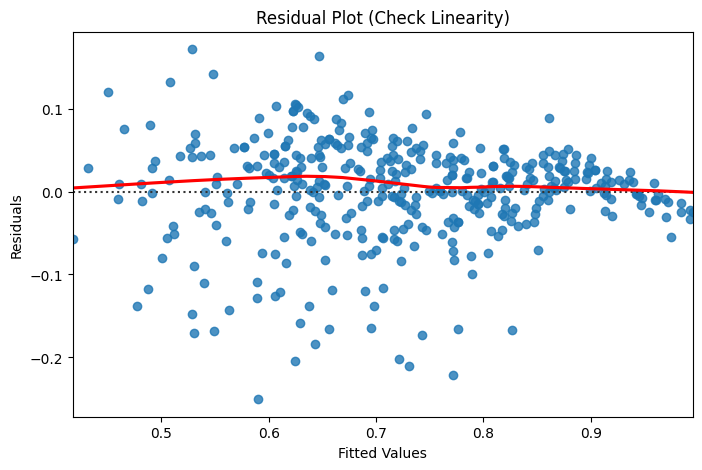

In [ ]:
# residual plot

plt.figure(figsize=(8, 5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Check Linearity)")
plt.show()


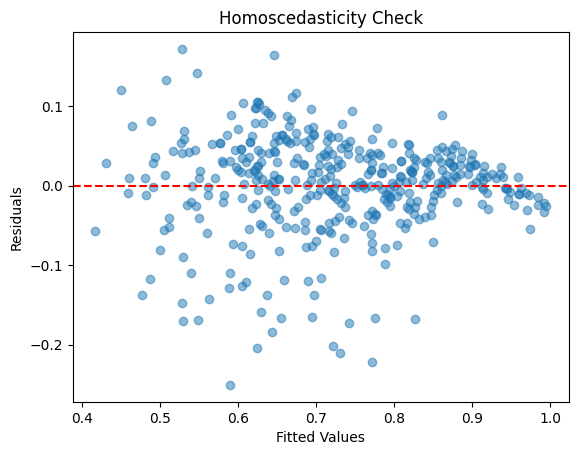

In [ ]:
# Homoscadasticity

plt.scatter(model.fittedvalues, model.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()

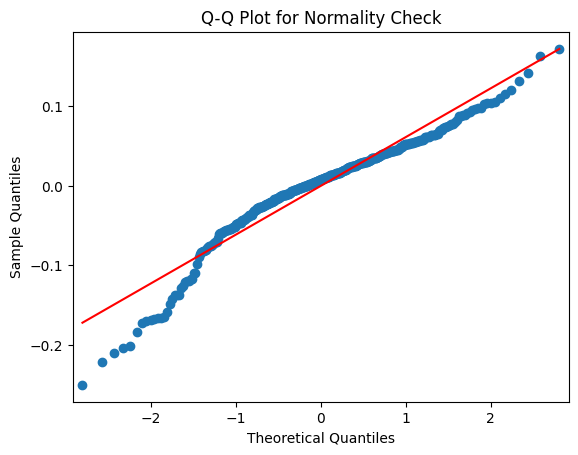

In [ ]:
import scipy.stats as stats
sm.qqplot(model.resid, line='s')
plt.title("Q-Q Plot for Normality Check")
plt.show()

In [ ]:
# After combining features

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df, i) for i in range(X_train_scaled_df.shape[1])]
sorted_vif = vif_data.sort_values(by='VIF', ascending=False)
sorted_vif

,feature,VIF
4,Combined_score,2.827895
1,SOP,2.761665
0,University Rating,2.532827
2,LOR,1.958310
3,Research,1.366562


<Axes: title={'center': 'VIF Scores'}, xlabel='feature', ylabel='VIF'>

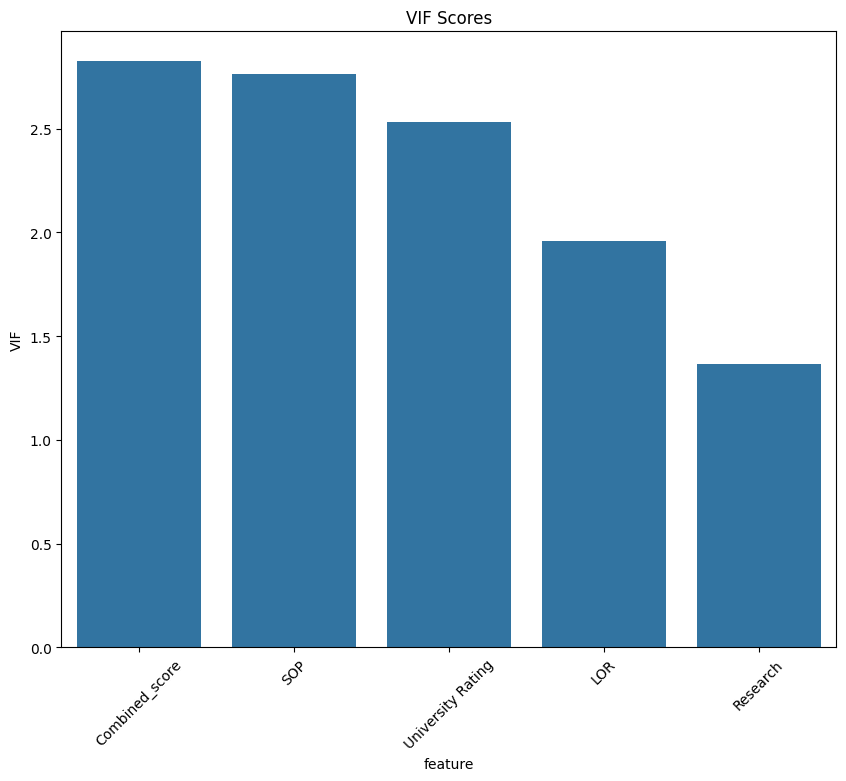

In [ ]:
plt.figure(figsize=(10,8))
plt.title("VIF Scores")
plt.xticks(rotation=45)
sns.barplot(data=sorted_vif,x='feature', y='VIF' )

In [ ]:
# Lasso and Ridge Regression
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(alpha=0.001)


In [ ]:
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.001)

In [ ]:
evaluate_model(lasso, X_test_scaled, y_test, X_train_scaled, y_train)


  Training data statistics
    Mean squared error = 0.0037614404980163742
    Root mean squared error = 0.061330583708427026
    R2 Score = 0.8091493748840359
    Adjusted R2 Score = 0.8067274126363714
  

  Testing data statistics
    Mean squared error = 0.0034230548621705724
    Root mean squared error = 0.05850687875942941
    R2 Score = 0.8326134541725881
    Adjusted R2 Score = 0.8237099145009172
  


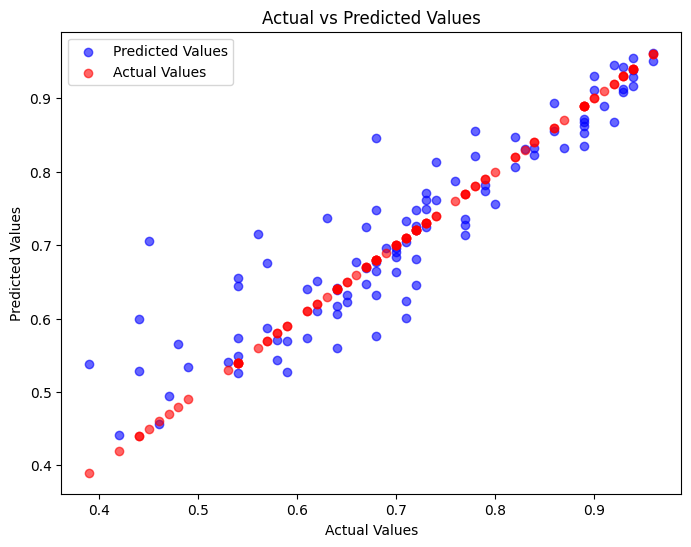

In [ ]:
plot_predictions(lasso, X_test_scaled, y_test)


  Training data statistics
    Mean squared error = 0.0037598381676037483
    Root mean squared error = 0.06131751925513416
    R2 Score = 0.8092306750564175
    Adjusted R2 Score = 0.806809744536829
  

  Testing data statistics
    Mean squared error = 0.0034220707471281416
    Root mean squared error = 0.058498467904109605
    R2 Score = 0.8326615771575481
    Adjusted R2 Score = 0.8237605972191198
  


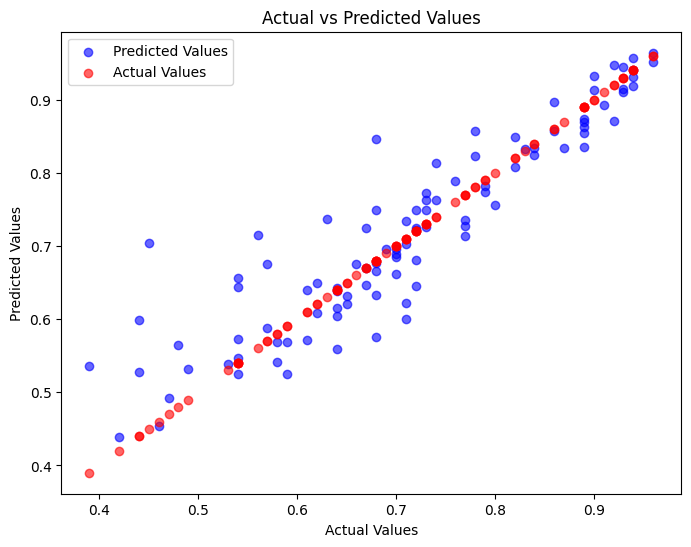

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
evaluate_model(ridge, X_test_scaled, y_test, X_train_scaled, y_train)
plot_predictions(ridge, X_test_scaled, y_test)